# Case Study 02 on Ensemble Learning



In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
data=pd.read_csv(r"C:\Users\USER\Downloads\salary.csv")

In [3]:
#Preview of data
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Shape of data
print(" Rows : {} Columns : {} ".format(data.shape[0],data.shape[1]))

 Rows : 32561 Columns : 15 


In [5]:
#Basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
# Checking for null values
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %' 

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education-num     0.0 %
marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital-gain      0.0 %
capital-loss      0.0 %
hours-per-week    0.0 %
native-country    0.0 %
salary            0.0 %
dtype: object

In [8]:
# Checking for ' ?' in dataset
round((data.isin([' ?']).sum() / data.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country    1.79 %
salary             0.0 %
dtype: object

In [9]:
# Checking the counts of label categories
salary = data['salary'].value_counts(normalize=True)
round(salary * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: salary, dtype: object

## Preprocessing

In [10]:
data = data.replace(' ?', np.nan)

In [11]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
# Checking null values
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country    1.79 %
salary             0.0 %
dtype: object

In [13]:
#filling missing values with mode
columns_with_nan = ['workclass', 'occupation', 'native-country']

for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

#### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtypes == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

#### Feature Selection

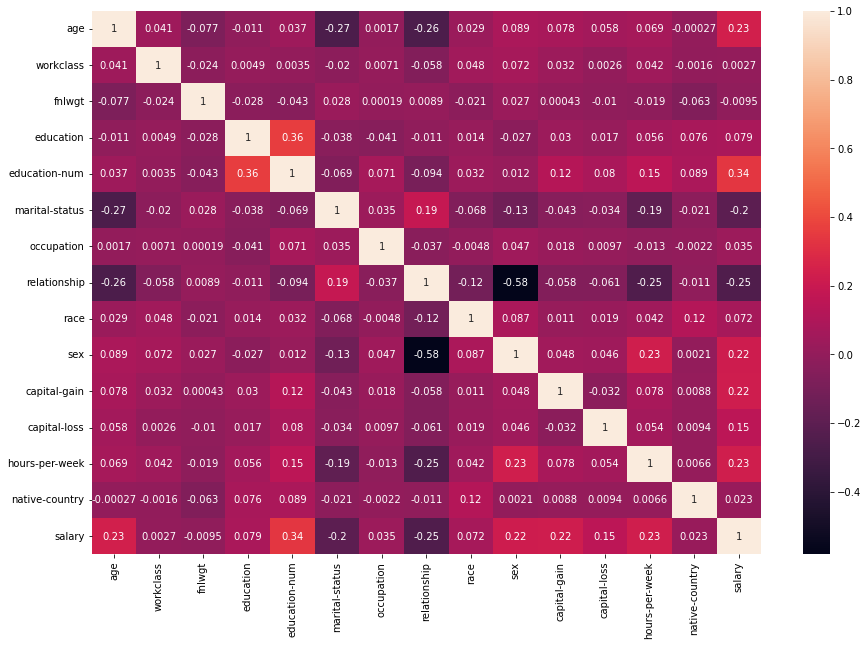

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

The columns 'workclass','fnlwgt','education','race','native-country' have very low correlation with the target. So we can drop those columns

In [16]:
X=data.drop(['salary','workclass','fnlwgt','education','race','native-country'],axis=1)
y=data['salary']

#### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

#### Fixing imbalanced dataset using Oversampling

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, y)
X, y = ros.fit_resample(X, y)

In [19]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

## 1. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred_dtc=dtc.predict(X_test)
print("Accuracy : ",round(100*accuracy_score(pred_dtc,y_test),2))

Accuracy :  88.95


## 2. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
print("Accuracy : ",round(100*accuracy_score(pred_rfc,y_test),2))

Accuracy :  90.59


## 3.Bagging

#### Bagging with logistic regression

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bg=BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, random_state=42)
bg.fit(X_train,y_train)
pred_bg_lr=bg.predict(X_test)
print("Accuracy : ",round(100*accuracy_score(pred_bg_lr,y_test),2))

Accuracy :  76.98


#### Bagging with Decision tree classifier

In [25]:
bg=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bg.fit(X_train,y_train)
pred_bg_tree=bg.predict(X_test)
print("Accuracy : ",round(100*accuracy_score(pred_bg_tree,y_test),2))

Accuracy :  90.36


## 4. Boosting

#### Adaboost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train)
y_pred_ada = ada_boost_clf.predict(X_test)
print("Accuracy : ",round(100*accuracy_score(y_test, y_pred_ada),2))

Accuracy :  83.41


#### Gradient boost Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("Accuracy : ",round(100*accuracy_score(y_test, y_pred_gbc),2))

Accuracy :  83.85


##### Random Forest Classifier and  Bagging with Decision tree algorithm have the higher accuracy of 90.59 and 90.36 respectively